In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
import missingno as msno
from datetime import datetime
%matplotlib inline

In [ ]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [5]:
app_launch_log = pd.read_csv('../input/app_launch_log.txt',header=None,sep='\t',names=['user_id','launch_day'])
app_launch_log.head()

,user_id,launch_day
0,383135,1
1,330986,4
2,330986,9
3,330986,11
4,330986,12


In [6]:
user_activity_log = pd.read_csv('../input/user_activity_log.txt',header=None,sep='\t',names=['user_id','activity_day','page','video_id','author_id','action_type'])
user_activity_log.head()

,user_id,activity_day,page,video_id,author_id,action_type
0,1062323,22,3,2877472,880271,0
1,639898,17,3,740662,210200,0
2,1260200,5,3,3332414,162866,0
3,817201,22,3,1129617,530246,0
4,817201,23,3,1129617,530246,0


In [10]:
video_create_log = pd.read_csv('../input/video_create_log.txt',header=None,sep='\t',names=['user_id','create_day'])
video_create_log.head()

,user_id,create_day
0,720497,1
1,720497,1
2,720497,1
3,1075211,6
4,1075211,12


In [ ]:
# split train and valid
#train_act,valid_act = user_act[user_act.day < 24],user_act[user_act.day >= 24]
#train_reg,valid_reg = user_reg[user_reg.register_day < 24],user_reg[user_reg.register_day >= 24]

In [6]:
user_register_log = pd.read_csv('../input/user_register_log.txt',header=None,sep='\t',names=['user_id','register_day','register_type','device_type'])
user_register_log.head()

,user_id,register_day,register_type,device_type
0,744025,1,1,283
1,1270299,1,1,259
2,571220,1,1,2
3,1308501,1,0,23
4,745554,1,2,0


In [20]:
user_register_log.shape

(51709, 4)

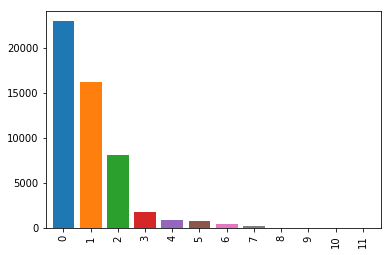

In [15]:
s = user_register_log['register_type'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

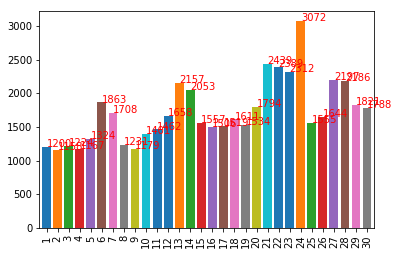

In [14]:
s = user_register_log['register_day'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

for i, v in s.reset_index().iterrows():
    ax.text(i, v.register_day + 0.2 , v.register_day, color='red')

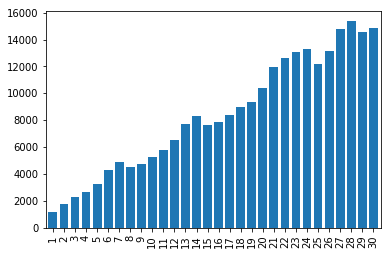

In [5]:
s = app_launch_log['launch_day'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

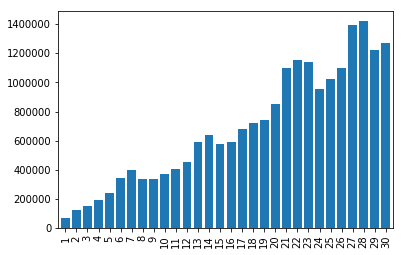

In [7]:
s = user_activity_log['activity_day'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

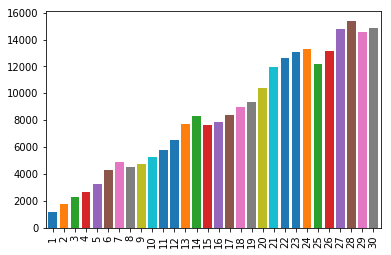

In [19]:
s = app_launch_log['launch_day'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

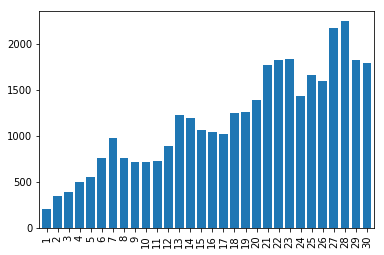

In [11]:
s = video_create_log['create_day'].value_counts().sort_index()
ax=s.plot.bar(width=.8) 

In [17]:
userPre = user_activity_log[user_activity_log.day>=24]
sub = userPre[['user_id']].drop_duplicates()
sub.to_csv('../submission/submission_{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')),encoding='utf-8',index=None,header=None)

In [9]:
user_register_log.columns

Index(['user_id', 'register_day', 'register_type', 'device_type'], dtype='object')

In [17]:
cat_feature_inds = []
for i, c in enumerate(user_register_log.columns):
    print(i,c)
    if c in ['register_type','device_type']:
        cat_feature_inds.append(i)


0 user_id
1 register_day
2 register_type
3 device_type


In [19]:
print([user_register_log[ind] for ind in cat_feature_inds])
# print("Cat features are: %s" % [user_register_log[ind] for ind in cat_feature_inds])

KeyError: 2